<a href="https://colab.research.google.com/github/irfanrois75-dotcom/Pengolahan-Citra-Digital/blob/main/Tugas_pertemuan7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

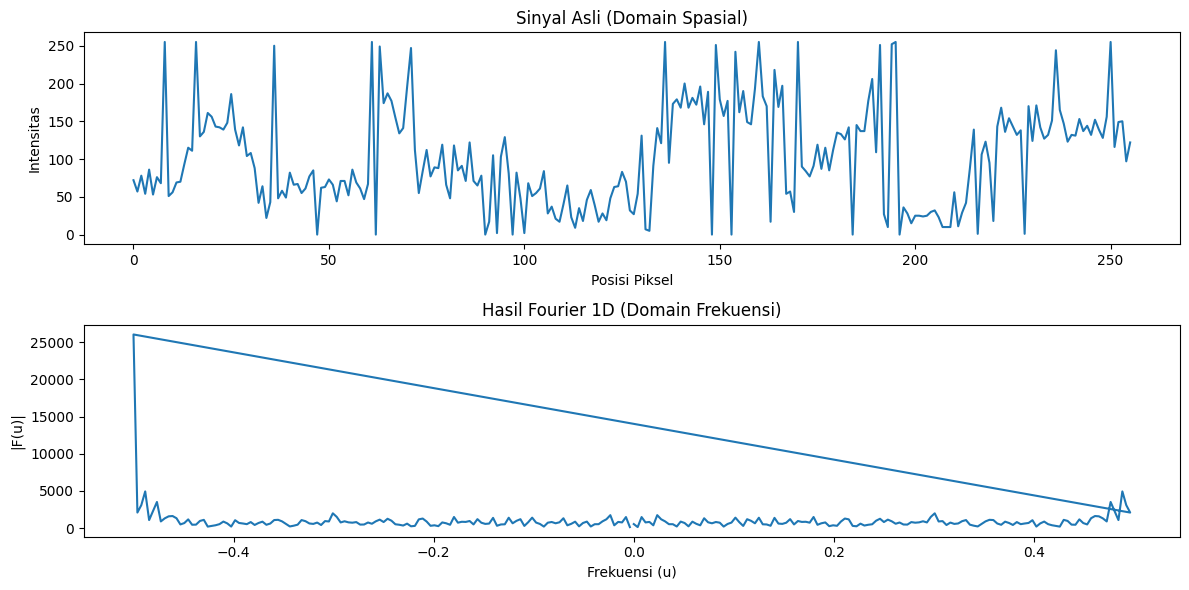

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('imgae_w_noise.png', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

Ukuran gambar: (256, 256)


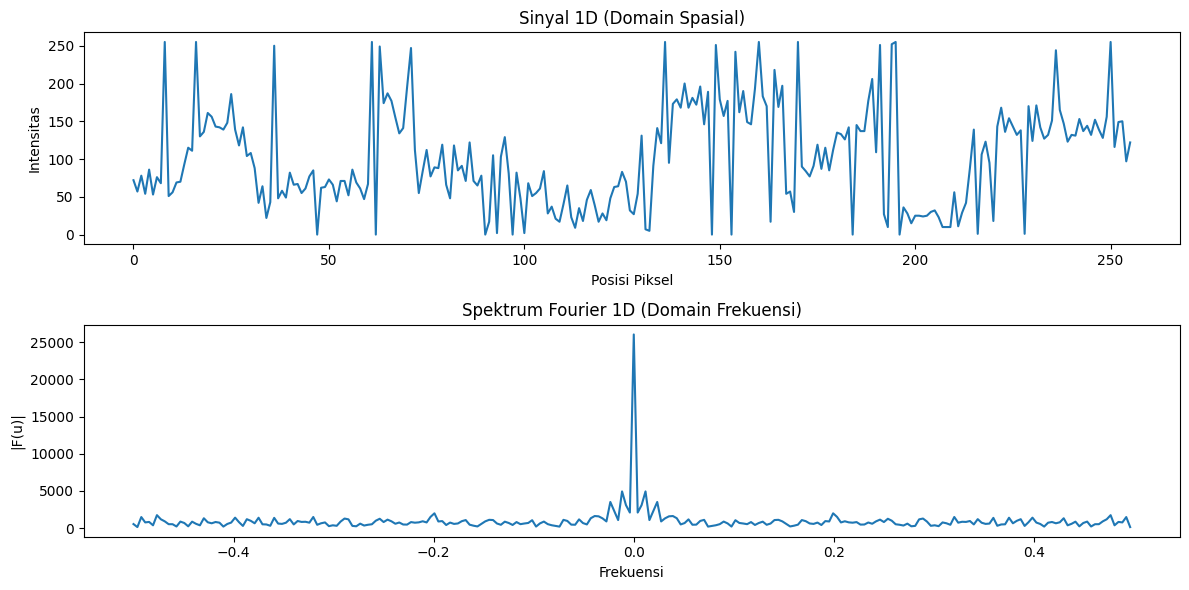

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale (PNG)
img = cv2.imread('/content/imgae_w_noise.png', 0)

# Cek apakah gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan! Pastikan nama dan lokasi file benar.")

print("Ukuran gambar:", img.shape)

# 2. Tentukan baris yang aman (gunakan baris tengah agar tidak error)
if img.shape[0] > 100:
    row = img[100, :]
else:
    row = img[img.shape[0] // 2, :]   # fallback: baris tengah

# 3. Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Magnitude spectrum
N = len(row)
freq = np.fft.fftfreq(N)
freq = np.fft.fftshift(freq)
magnitude = np.abs(Fshift)

# 5. Plot hasil
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal 1D (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Spektrum Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi')
plt.ylabel('|F(u)|')

plt.tight_layout()
plt.show()


Ukuran gambar: (256, 256)


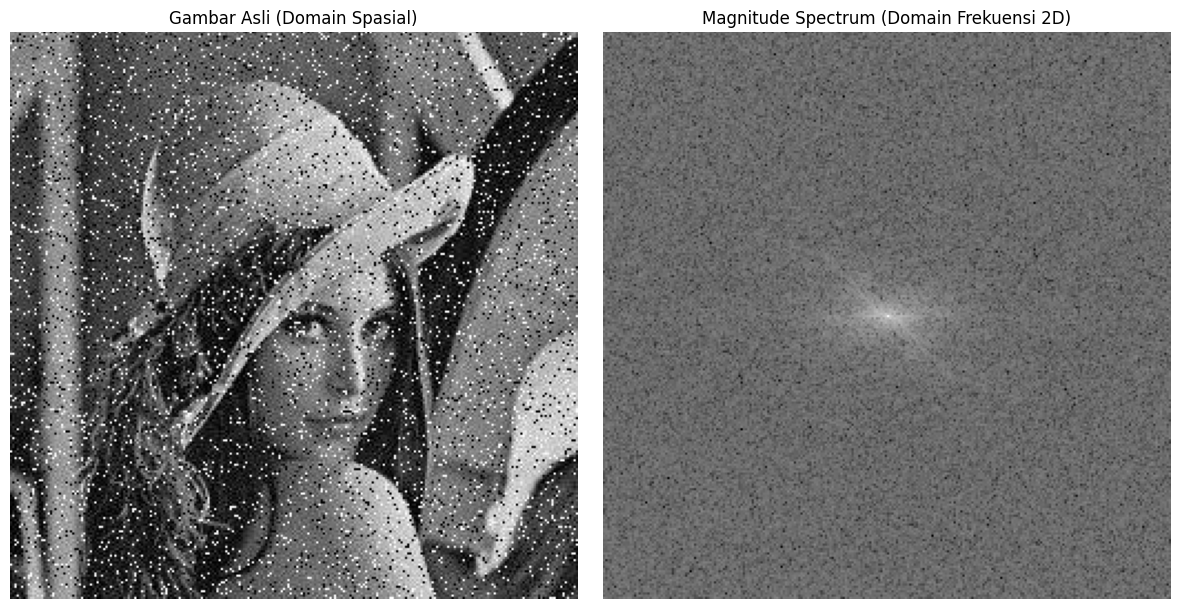

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('/content/imgae_w_noise.png', 0)

# Cek apakah gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan! Pastikan nama file benar dan berada di folder /content/.")

print("Ukuran gambar:", img.shape)

# 2. Fourier Transform 2D
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

# 3. Hitung magnitude spectrum (log agar terlihat)
magnitude_spectrum = np.log(1 + np.abs(Fshift))

# 4. Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli (Domain Spasial)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Domain Frekuensi 2D)')
plt.axis('off')

plt.tight_layout()
plt.show()


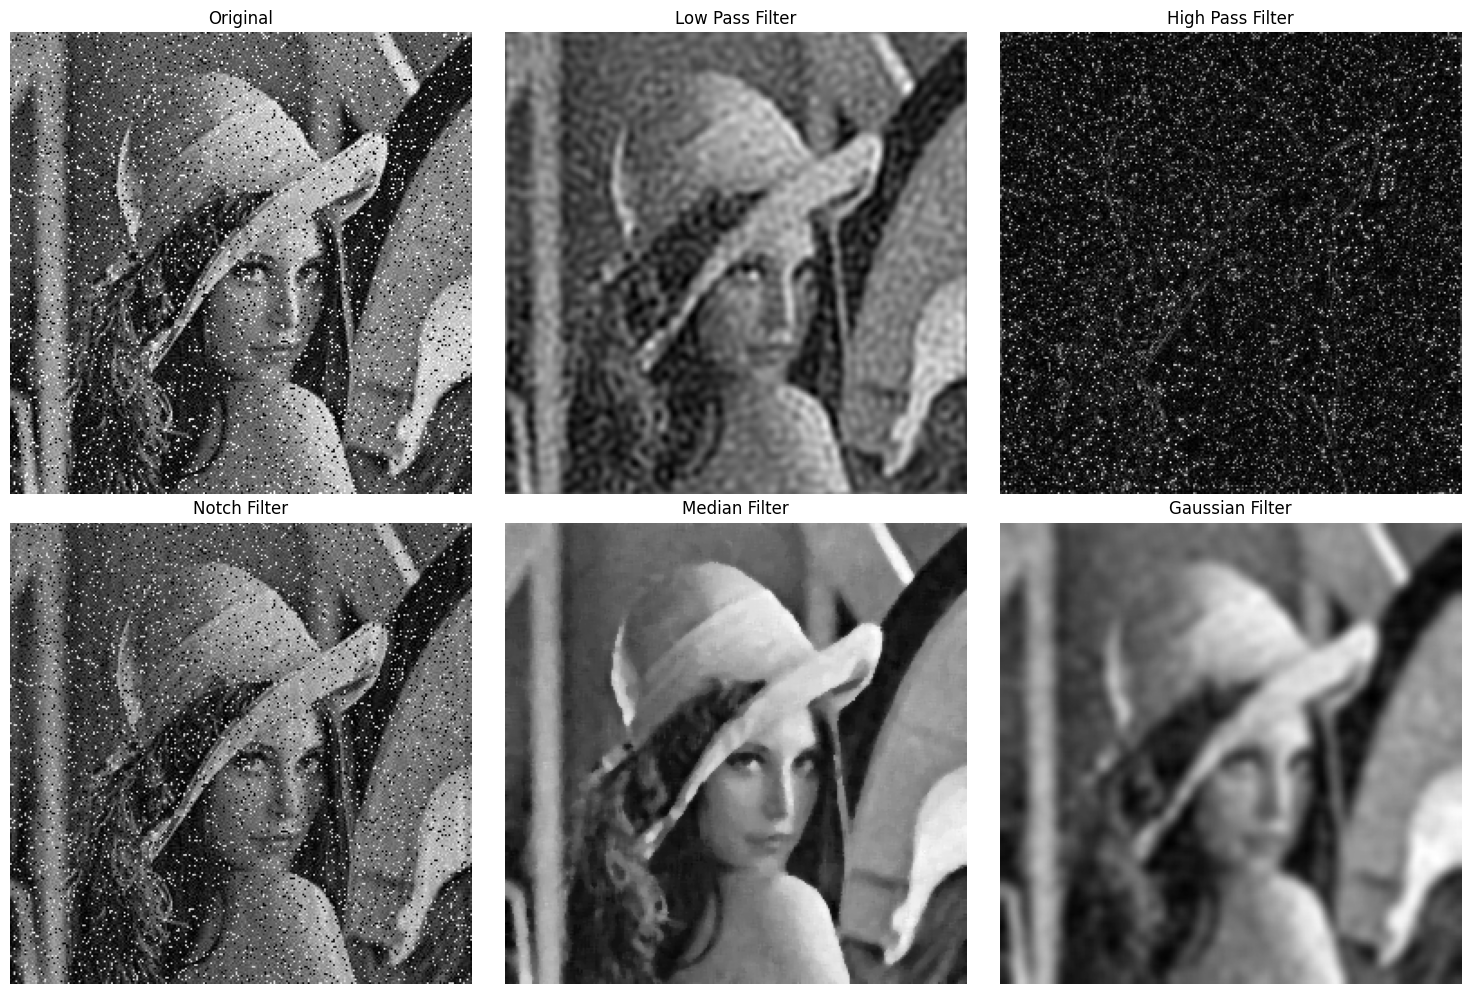

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1. Load Gambar Grayscale
# ============================
img = cv2.imread('/content/imgae_w_noise.png', 0)

if img is None:
    raise ValueError("File tidak ditemukan! Pastikan nama dan lokasi gambar benar.")

# ukuran
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# ============================
# 2. Fourier Transform 2D
# ============================
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

# ============================
# 3A. Low Pass Filter (LPF)
# ============================
LPF = np.zeros((rows, cols), np.uint8)
cv2.circle(LPF, (ccol, crow), 40, 1, -1)  # radius = 40

F_lpf = Fshift * LPF
img_lpf = np.fft.ifft2(np.fft.ifftshift(F_lpf))
img_lpf = np.abs(img_lpf)

# ============================
# 3B. High Pass Filter (HPF)
# ============================
HPF = 1 - LPF

F_hpf = Fshift * HPF
img_hpf = np.fft.ifft2(np.fft.ifftshift(F_hpf))
img_hpf = np.abs(img_hpf)

# ============================
# 3C. Notch Filter (dua titik contoh)
# ============================
notch = np.ones((rows, cols), np.uint8)

d = 30  # offset dari pusat
cv2.circle(notch, (ccol + d, crow), 10, 0, -1)
cv2.circle(notch, (ccol - d, crow), 10, 0, -1)

F_notch = Fshift * notch
img_notch = np.fft.ifft2(np.fft.ifftshift(F_notch))
img_notch = np.abs(img_notch)

# ============================
# 3D. Median Filter (spatial)
# ============================
img_median = cv2.medianBlur(img, 5)

# ============================
# 3E. Gaussian Filter (spatial)
# ============================
img_gauss = cv2.GaussianBlur(img, (11,11), 3)

# ============================
# 4. Tampilkan Semua Hasil
# ============================
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_lpf, cmap='gray')
plt.title("Low Pass Filter")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_hpf, cmap='gray')
plt.title("High Pass Filter")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(img_notch, cmap='gray')
plt.title("Notch Filter")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img_median, cmap='gray')
plt.title("Median Filter")
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_gauss, cmap='gray')
plt.title("Gaussian Filter")
plt.axis('off')

plt.tight_layout()
plt.show()
